# Es 12.1

Si richiede di verificare il comportamento di una Deep Neural Network al variare degli ottimizzatori.

Implemento la rete:

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


seed=0
np.random.seed(seed) # fix random seed
#tf.set_random_seed(seed)
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [6]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [7]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [8]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [9]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.9311 - accuracy: 0.6950 - val_loss: 0.4484 - val_accuracy: 0.8651
Epoch 2/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.4981 - accuracy: 0.8530 - val_loss: 0.3301 - val_accuracy: 0.9015
Epoch 3/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3984 - accuracy: 0.8863 - val_loss: 0.2628 - val_accuracy: 0.9200
Epoch 4/5
60000/60000 [==============================] - 11s 186us/sample - loss: 0.3254 - accuracy: 0.9076 - val_loss: 0.2161 - val_accuracy: 0.9339
Epoch 5/5
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2650 - accuracy: 0.9264 - val_loss: 0.1856 - val_accuracy: 0.9440


10000/10000 [==============================] - 1s 69us/sample - loss: 0.1856 - accuracy: 0.9440

Test loss: 0.18556777503043412
Test accuracy: 0.944


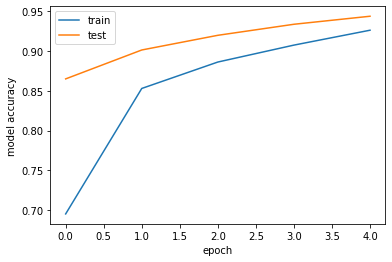

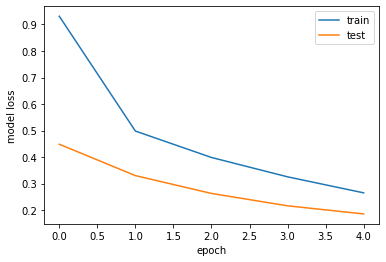

In [10]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

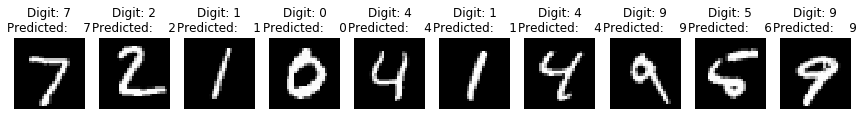

In [11]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In questo caso ho osservato che la migliore funzione di ottimizzazione è ADAM. Si mostrano sotto tutte gli altri grafici ottenuti con le altre funzioni di ottimizzazione:

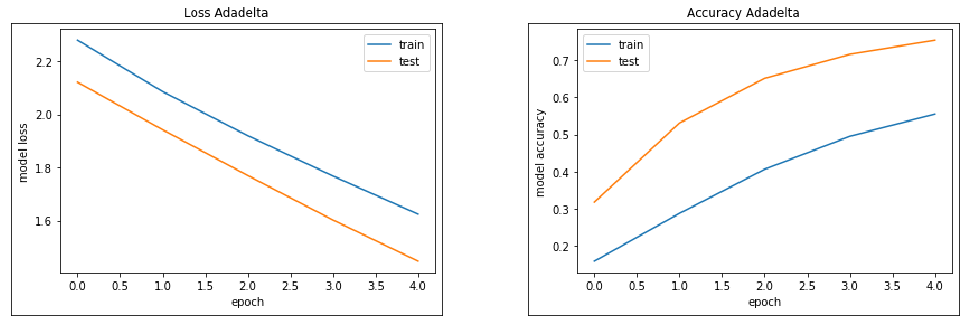

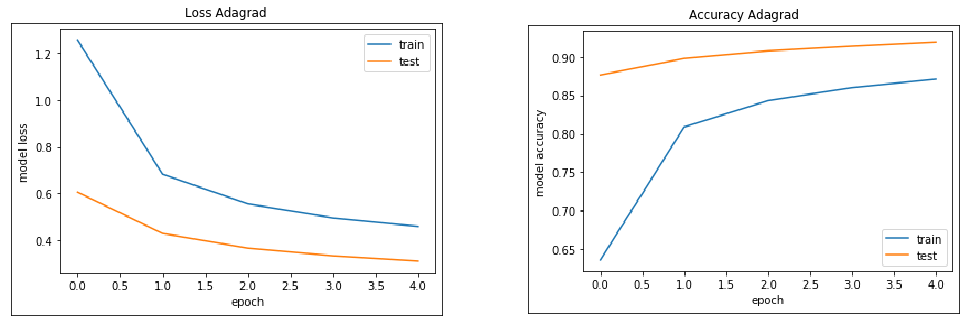

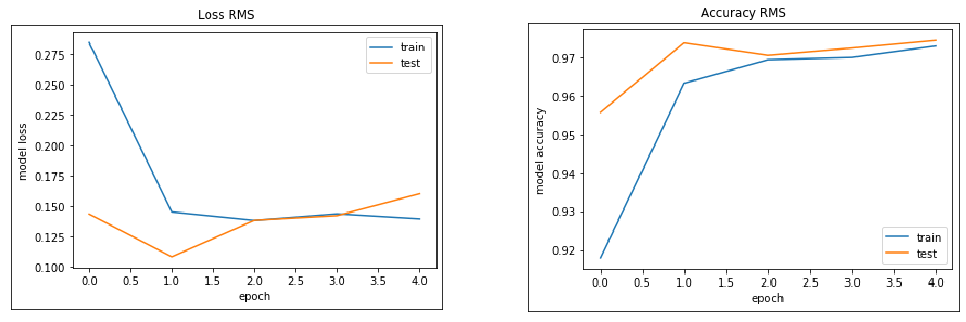

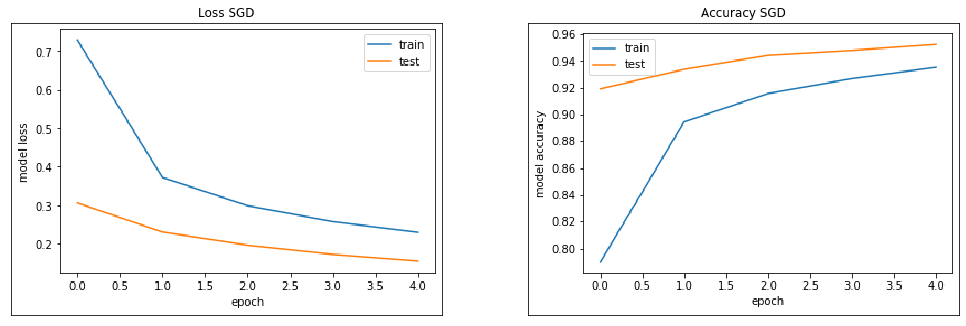

In [8]:
lDelta = plt.imread('Immagini/Adadelta_loss.png')
aDelta = plt.imread('Immagini/Adadelta_accuracy.png')
lGrad = plt.imread('Immagini/Adagrad_loss.png')
aGrad = plt.imread('Immagini/Adagrad_accuracy.png')
lRMS = plt.imread('Immagini/RMSprop_loss.png')
aRMS = plt.imread('Immagini/RMSprop_accuracy.png')
lSGD = plt.imread('Immagini/SGD_loss.png')
aSGD = plt.imread('Immagini/SGD_accuracy.png')


plt.figure(figsize=(17,9))
plt.subplot(1, 2, 1)
plt.imshow(lDelta)
plt.title('Loss Adadelta')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.subplot(1, 2, 2)
plt.imshow(aDelta)
plt.title('Accuracy Adadelta')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.figure(figsize=(17,9))
plt.subplot(1, 2, 1)
plt.imshow(lGrad)
plt.title('Loss Adagrad')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.subplot(1, 2, 2)
plt.imshow(aGrad)
plt.title('Accuracy Adagrad')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.figure(figsize=(17,9))
plt.subplot(1, 2, 1)
plt.imshow(lRMS)
plt.title('Loss RMS')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.subplot(1, 2, 2)
plt.imshow(aRMS)
plt.title('Accuracy RMS')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.figure(figsize=(17,9))
plt.subplot(1, 2, 1)
plt.imshow(lSGD)
plt.title('Loss SGD')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.subplot(1, 2, 2)
plt.imshow(aSGD)
plt.title('Accuracy SGD')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.show()

# Es 12.2

Si richiede di implementare una Convolutional Neural Network:

In [13]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)    

    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000,)

60000 train samples
10000 test samples


In [14]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    # pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    # dropout with rate 0.5
    model.add(Dropout(0.5))
    # convolutional layer with 16 filters
    model.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
    # pooling layer 
    model.add(MaxPooling2D(pool_size=(2,2)))
    # dropout with rate 0.5
    model.add(Dropout(0.5))
    # flatten layer
    model.add(Flatten())
    # dense layer
    model.add(Dense(100,activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [15]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 629us/sample - loss: 0.4344 - accuracy: 0.8580 - val_loss: 0.0970 - val_accuracy: 0.9721
Epoch 2/5
60000/60000 [==============================] - 35s 587us/sample - loss: 0.1937 - accuracy: 0.9389 - val_loss: 0.0622 - val_accuracy: 0.9819
Epoch 3/5
60000/60000 [==============================] - 40s 659us/sample - loss: 0.1571 - accuracy: 0.9505 - val_loss: 0.0498 - val_accuracy: 0.9836
Epoch 4/5
60000/60000 [==============================] - 37s 618us/sample - loss: 0.1410 - accuracy: 0.9557 - val_loss: 0.0481 - val_accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 37s 623us/sample - loss: 0.1292 - accuracy: 0.9588 - val_loss: 0.0418 - val_accuracy: 0.9874


10000/10000 [==============================] - 2s 187us/sample - loss: 0.0418 - accuracy: 0.9874

Test loss: 0.041785135347023605
Test accuracy: 0.9874


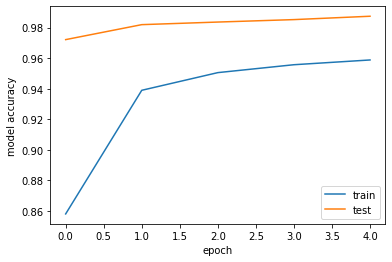

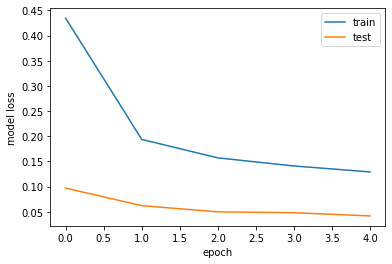

In [16]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

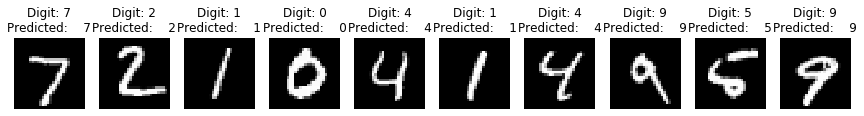

In [17]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# Es 12.3

Si richiede di scrivere le 10 cifre a mano e di verificare se le due reti implementate in precedenza sono in grado di riconoscerle.

Image size: 28x28


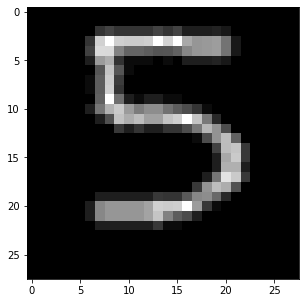

(28, 28)


In [24]:
from PIL import Image
import os

digit_filename = "Immagini/Cifra_cinque.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

(28, 28)
(1, 784)


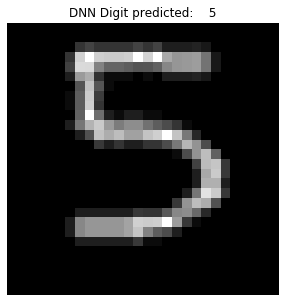

In [25]:
print(data.shape)
data = data.reshape(1,xdim*ydim)
print(data.shape)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("DNN Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

(1, 28, 28, 1)


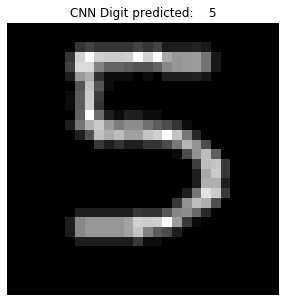

In [26]:
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(1,1,xdim,ydim)
else:
    data = data.reshape(1,xdim,ydim,1)
print(data.shape)
pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("CNN Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()